### Homework 24
V. Ivanouskaya
11.02.2024
v1

### Работа с временными рядами.
    
Известно ежемесячное число смертей в результате несчастного случая в США с января 1973 по декабрь 1978, необходимо построить прогноз на следующие 2 года

Введение
Анализ временных рядов позволяет исследовать структуру и динамику данных для создания прогноза. В данной задаче,с помощью анализа временного ряда смертей от несчастных случаев попробую выявить возможные тренды, сезонности и др., которые могут быть использованы для создания прогноза на следующие 2 года

In [2]:
import pandas as pd
data = pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [4]:
data.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


В таблице два столбца: "Month" с месяцем и годом наблюдения и "Accidental deaths in USA: monthly, 1973 ? 1978" с количеством ежемесячных смертей в результате несчастных случаев в США с января 1973 по декабрь 1978 года.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Month                                           72 non-null     object
 1   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [6]:
# Преобразование столбца 'Month' в формат datetime и установка его в качестве индекса
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1973-01-01 to 1978-12-01
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [8]:
# Проверка и преобразование данных в временной ряд
ts = data['Accidental deaths in USA: monthly, 1973 ? 1978']

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Декомпозиция временного ряда на тренд, сезонность и остаток
decomposition = seasonal_decompose(ts, model='additive')

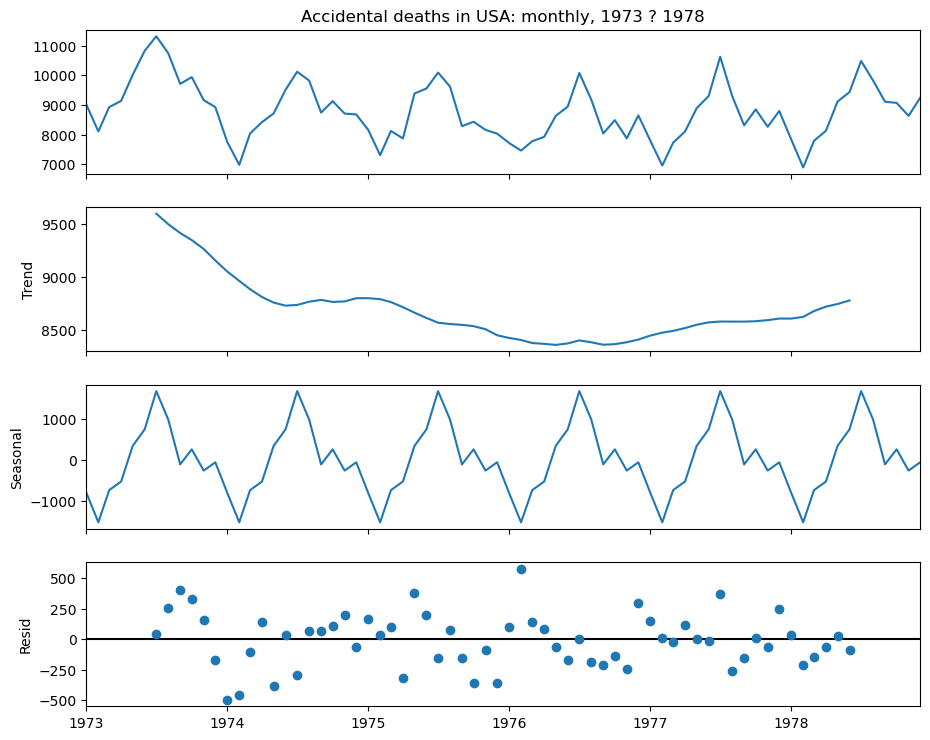

In [11]:
import matplotlib.pyplot as plt
# Визуализация компонент временного ряда
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

###### Из графиков видна явно выраженная сезонность, а также тренд на увеличение числа смертей со временем

##### Построение прогноза на следующие 2 года. 
Для этого я использую модель SARIMA, которая хорошо подходит для временных рядов с трендами и сезонностью

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
# Определение параметров модели SARIMA
p, d, q = 2, 1, 2
# Сезонные параметры на основе наблюдаемой сезонности (12 месяцев)
P, D, Q, s = 1, 1, 1, 12
# Обучение модели SARIMAX
model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

C:\Users\veran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\veran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
# Прогнозирование на следующие 24 месяца (2года)
forecast = results.forecast(steps=24)

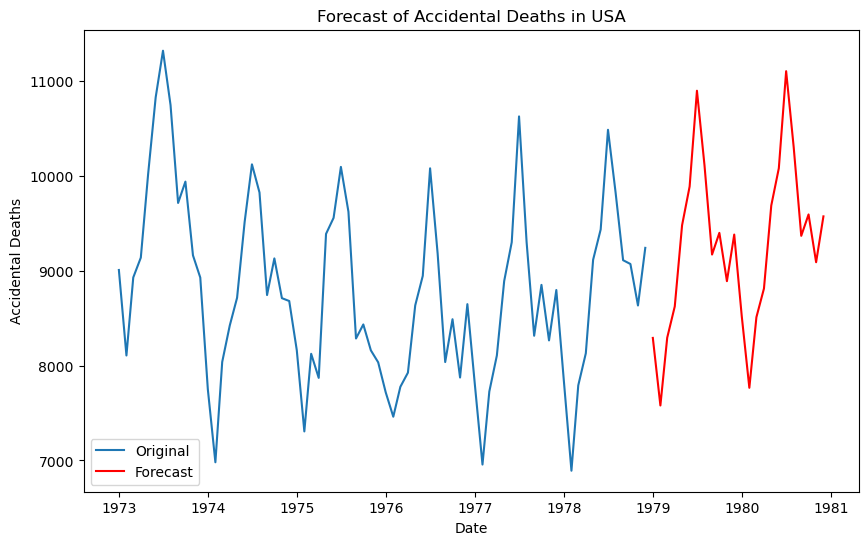

In [18]:
# Визуализация исходных данных и прогноза
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Accidental Deaths')
plt.title('Forecast of Accidental Deaths in USA')
plt.legend()
plt.show()

##### Вывод
График указывает на продолжение наблюдаемых трендов и сезонных колебаний. 
Модель предполагает увеличение числа смертей, следуя тренду и сезонности в данных